In [1]:
from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof, expand_proof_step_ps

from collections import defaultdict

In [2]:
%%time

text = file_contents("set.mm")
database = meta_math_database(text,n=3500)

included 5555695 tokens from set.mm
proposition: 3500CPU times: user 9.78 s, sys: 296 ms, total: 10.1 s
Wall time: 10.2 s


dfss2


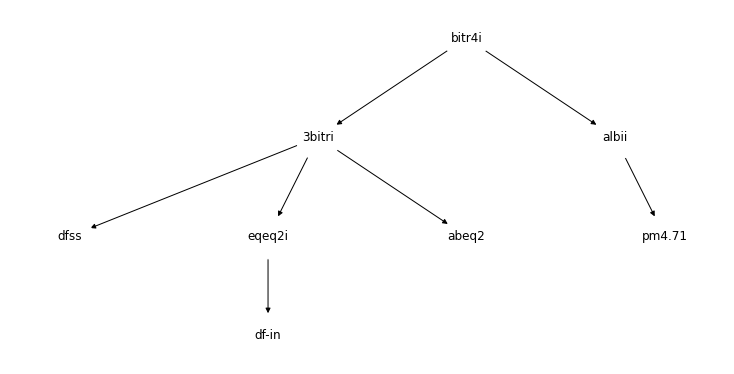

 <PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PStep:albii ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [3]:
prop = database.propositions["dfss2"]
#prop = database.propositions_list[-1]
print(prop.label)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
prop_proof.print_linear()

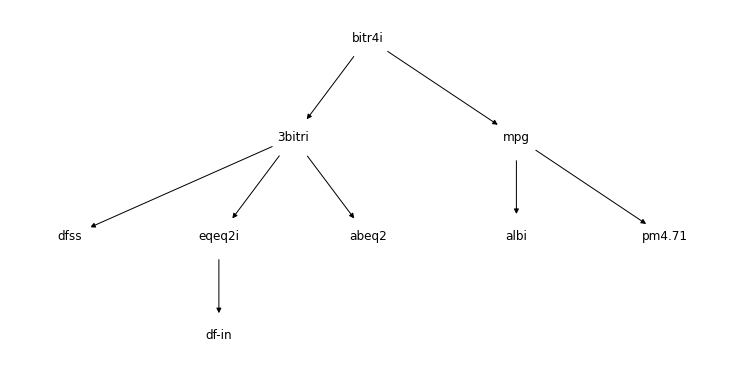

 <PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PStep:mpg ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:albi ⊢ ( ∀ x ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) ) → ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) ) )>
 |  |  <PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [4]:
prop_proof = prop_proof.inputs[1].expand()
prop_proof.print_graph()
prop_proof.print_linear()